This notebook makes many plots of network predictions. Note that there is still something weird withe the predictions of the final corrected network.

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random as rn

from math import pi

from metrics import metrics

/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/kronheim/.local/share/virtualenvs/Honors-7_jeLJAf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16"

Set the three variables in the next cell to determine the dataset and networks used.

In [2]:
dataFile = "gitJetData" #File for the predictions here
network = "gitCorrection1" #Network for the final correction
networkInputFileName = "gitJetData.npy" #Data file used to train network

The following cell extracts the data. Comment out the first two lines if the .npy file as already been made.

In [3]:
#data = np.loadtxt(dataFile + ".txt")
#np.save(dataFile + ".npy", data)
data = np.load(dataFile + ".npy").T

The following cell makes a few graphs showing the state of the predictions prior to the final correction

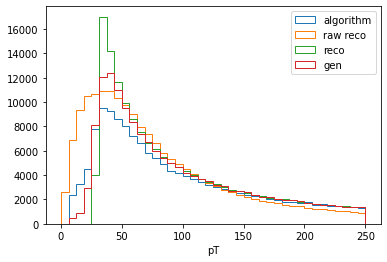

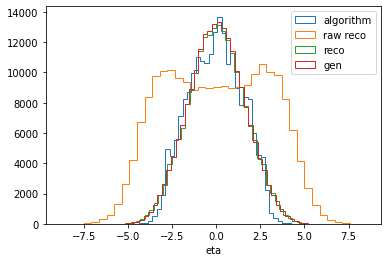

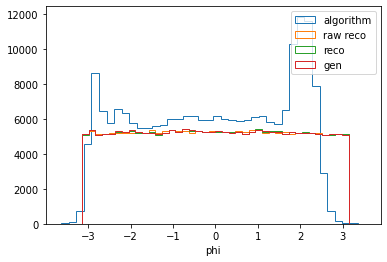

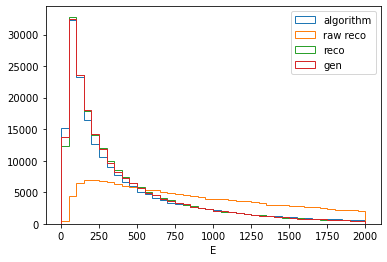

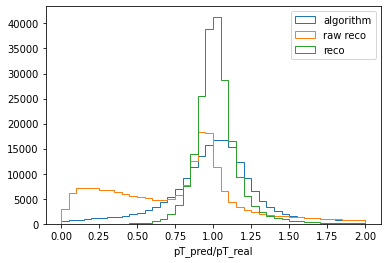

In [4]:
plt.figure()
plt.hist(data[0], range=(0,250), bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[4], range=(0,250), bins=40, label="raw reco", alpha=1, histtype="step")
plt.hist(data[8], range=(0,250), bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12], range=(0,250), bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("pT")
plt.legend()
plt.show()

x=1
plt.figure()
plt.hist(data[0+x], bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[4+x], bins=40, label="raw reco", alpha=1, histtype="step")
plt.hist(data[8+x], bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12+x], bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("eta")
plt.legend()
plt.show()
x=2
plt.figure()
#plt.hist(((data[0+x]+pi)%(2*pi))-pi, bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[0+x], bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[4+x], bins=40, label="raw reco", alpha=1, histtype="step")
plt.hist(data[8+x], bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12+x], bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("phi")
plt.legend()
plt.show()
x=3
plt.figure()
plt.hist(data[0+x], range=(0,2000), bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(data[4+x], range=(0,2000), bins=40, label="raw reco", alpha=1, histtype="step")
plt.hist(data[8+x], range=(0,2000), bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12+x], range=(0,2000), bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("E")
plt.legend()
plt.show()

plt.figure()
plt.hist(np.abs(data[0])/data[12], label="algorithm", bins=40, range=(0,2), alpha=1, histtype="step")
plt.hist(np.abs(data[4])/data[12], label="raw reco", bins=40, range=(0,2), alpha=1, histtype="step")
plt.hist(np.abs(data[8])/data[12], label="reco", bins=40, range=(0,2), alpha=1, histtype="step")
plt.xlabel("pT_pred/pT_real")
plt.legend()
plt.show()
    

The following cell gets normalization info for the predictions.

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["PYTHONHASHSEED"] = "0"
np.random.seed(42)
rn.seed(12345)
tf.random.set_seed(3)

#Define some parameters for the network


dataInitial=np.load(networkInputFileName).T
for x in [0,3,12,15]:
    dataInitial[x] = np.log(tf.math.maximum(dataInitial[x],0.01))

meanAlgPt=np.mean(dataInitial[0])
meanAlgEta=np.mean(dataInitial[1])
meanAlgPhi=0
meanAlgE=np.mean(dataInitial[3])

stdAlgPt=np.std(dataInitial[0])
stdAlgEta=np.std(dataInitial[1])
stdAlgPhi=1
stdAlgE=np.std(dataInitial[3])

meanGenPt=np.mean(dataInitial[12])
meanGenEta=np.mean(dataInitial[13])
meanGenPhi=0
meanGenE=np.mean(dataInitial[15])

stdGenPt=np.std(dataInitial[12])
stdGenEta=np.std(dataInitial[13])
stdGenPhi=1
stdGenE=np.std(dataInitial[15])

metricObject = metrics(meanGenPt, stdGenPt, meanGenEta, stdGenEta, meanGenPhi, stdGenPhi)


The following cell creates a lot of graphs showing the overall performance of the algorithm.

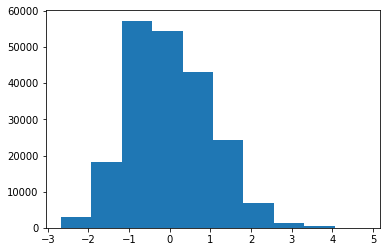

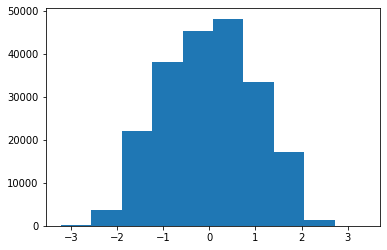

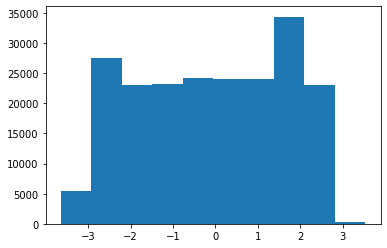

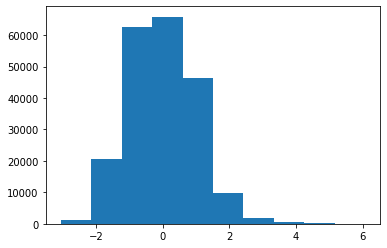

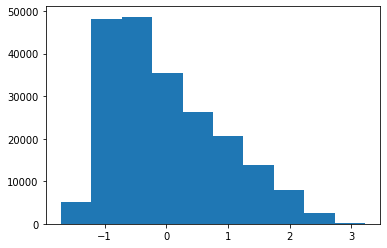

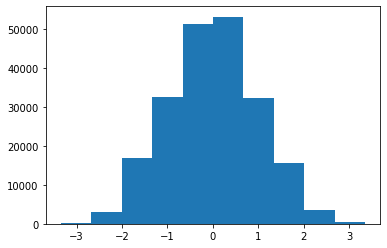

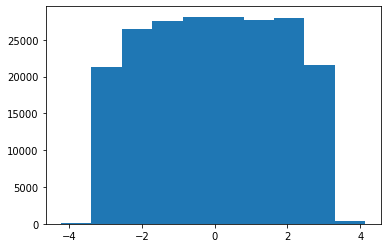

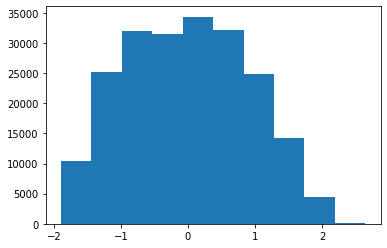

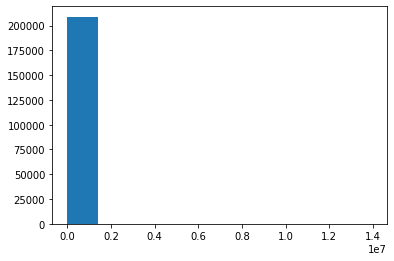

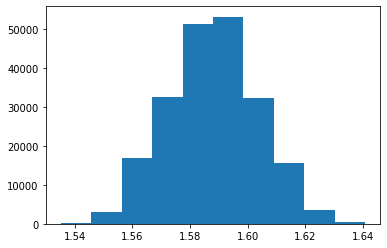

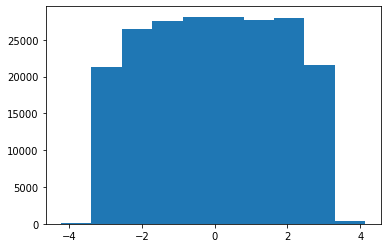

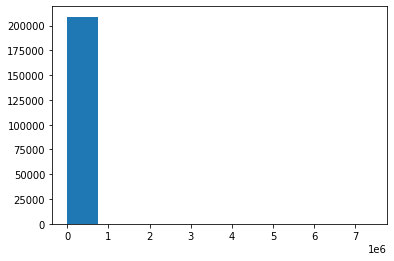

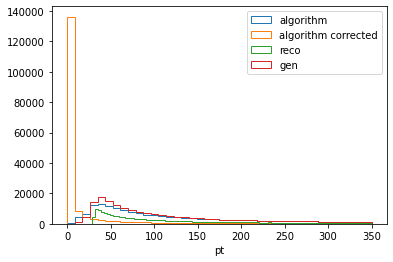

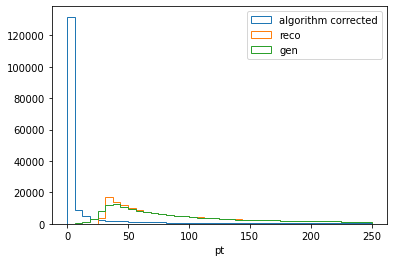

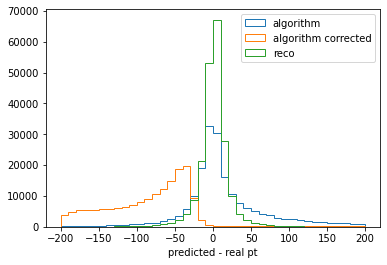

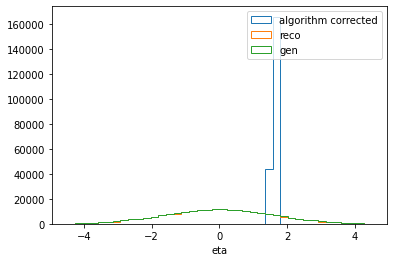

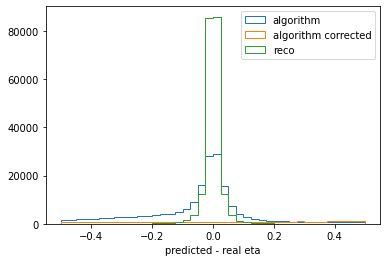

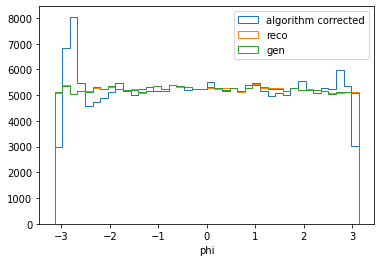

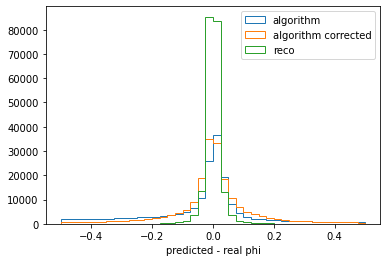

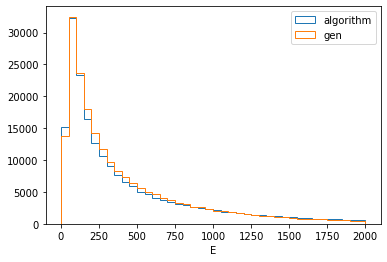

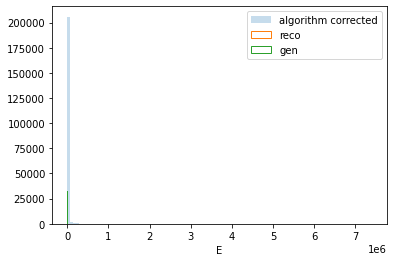

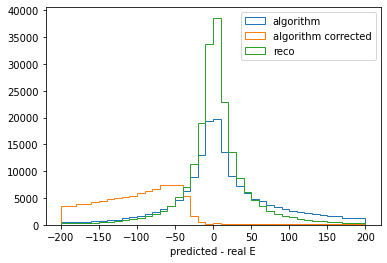

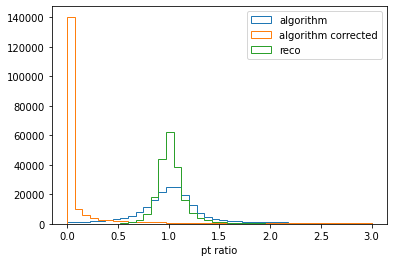

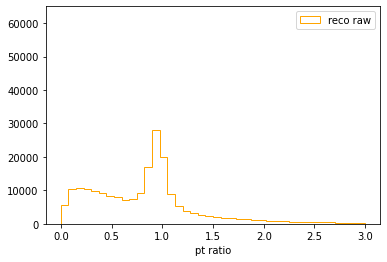

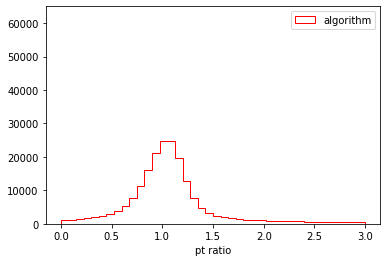

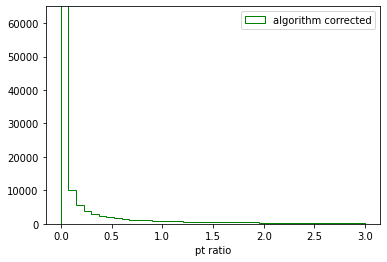

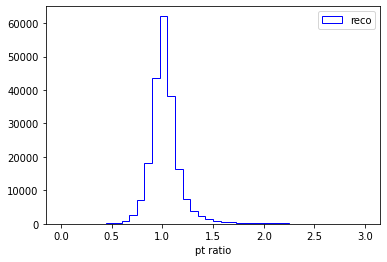

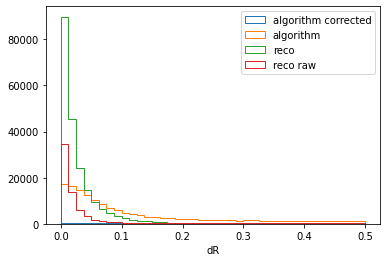

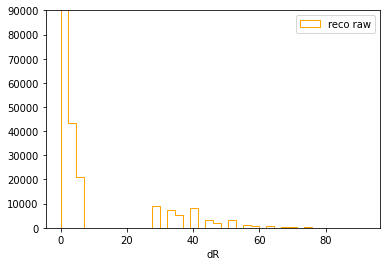

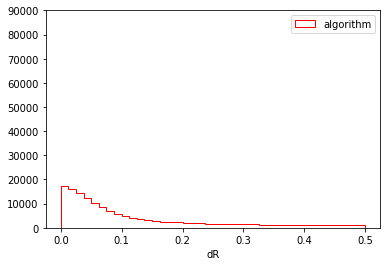

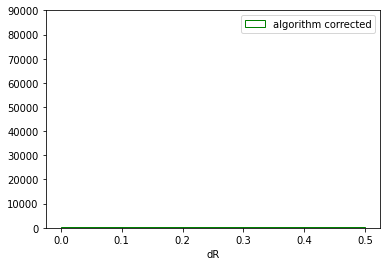

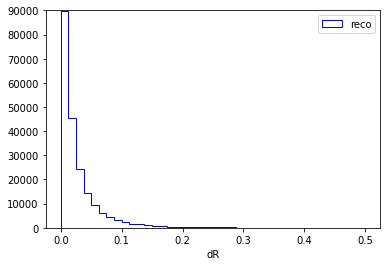

In [10]:
model = tf.keras.models.load_model(network, compile=False)#,custom_objects={"custom_loss": custom_loss})
model.compile(optimizer=tf.keras.optimizers.Adam(0.01,
                  amsgrad=True),loss=tf.keras.losses.MeanSquaredError(),
                  metrics=["mae", "mse"])

inputData = np.copy(data[0:4,:])
inputData[0]=(np.log(np.maximum(inputData[0],0.01))-meanAlgPt)/stdAlgPt
inputData[1]=(inputData[1]-meanAlgEta)/stdAlgEta
inputData[3]=(np.log(np.maximum(inputData[3],0.01))-meanAlgE)/stdAlgE
for x in range(4):
    plt.figure()
    plt.hist(inputData[x])
    plt.show()

predictions = model.predict(inputData.T).T
for x in range(4):
    plt.figure()
    plt.hist(predictions[x])
    plt.show()
predictions[0]=np.exp((predictions[0]*meanGenPt)+stdGenPt)
predictions[1]=(predictions[1]*meanGenEta)+stdGenEta
predictions[3]=np.exp((predictions[3]*meanGenE)+stdGenE)
for x in range(4):
    plt.figure()
    plt.hist(predictions[x])
    plt.show()


x=0
plt.figure()
plt.hist(data[0], range=(0,350), bins=40, label="algorithm", alpha=1, histtype="step")
plt.hist(predictions[0], range=(0,350), bins=40, label="algorithm corrected", alpha=1, histtype="step")
plt.hist(data[8], range=(0,350), bins=100, label="reco", alpha=1, histtype="step")
plt.hist(data[12], range=(0,350), bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("pt")
plt.legend()
plt.show()

plt.figure()
plt.hist(predictions[0], range=(0,250), bins=40, label="algorithm corrected", histtype="step")
plt.hist(data[8], range=(0,250), bins=40, label="reco", alpha=1, histtype="step")
plt.hist(data[12], range=(0,250), bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("pt")
plt.legend()
plt.show()

plt.figure()
plt.hist(data[0+x]-data[12+x], histtype="step", label="algorithm", bins = 40, range=(-200,200))
plt.hist(predictions[0+x]-data[12+x], histtype="step", label="algorithm corrected", bins = 40,  range=(-200,200))
plt.hist(data[8+x]-data[12+x], histtype="step", label="reco", bins = 40,  range=(-200,200))
plt.xlabel("predicted - real pt")
plt.legend()
plt.show()
x=1

plt.figure()
plt.hist(predictions[0+x], bins=40, label="algorithm corrected", range=(-4.5,4.5), histtype="step")
plt.hist(data[8+x], bins=40, label="reco", alpha=1, range=(-4.5,4.5), histtype="step")
plt.hist(data[12+x], bins=40, label="gen", alpha=1, range=(-4.5,4.5), histtype="step")
plt.xlabel("eta")
plt.legend()
plt.show()

plt.figure()
plt.hist(data[0+x]-data[12+x], histtype="step", label="algorithm", bins = 40, range=(-.5,.5))
plt.hist(predictions[0+x]-data[12+x], histtype="step", label="algorithm corrected", bins = 40,  range=(-.5,.5))
plt.hist(data[8+x]-data[12+x], histtype="step", label="reco", bins = 40,  range=(-.5,.5))
plt.xlabel("predicted - real eta")
plt.legend()
plt.show()

x=2


plt.figure()
plt.hist(((predictions[0+x]+pi)%(2*pi))-pi, bins=40, label="algorithm corrected", alpha=1, histtype="step")
plt.hist(((data[8+x]+pi)%(2*pi))-pi, bins=40, label="reco", alpha=1, histtype="step")
plt.hist(((data[12+x]+pi)%(2*pi))-pi, bins=40, label="gen", alpha=1, histtype="step")
plt.xlabel("phi")
plt.legend()
plt.show()

plt.figure()
plt.hist(data[0+x]-data[12+x], histtype="step", label="algorithm", bins = 40, range=(-.5,.5))
plt.hist(predictions[0+x]-data[12+x], histtype="step", label="algorithm corrected", bins = 40,  range=(-.5,.5))
plt.hist(data[8+x]-data[12+x], histtype="step", label="reco", bins = 40,  range=(-.5,.5))
plt.xlabel("predicted - real phi")
plt.legend()
plt.show()

x=3

plt.figure()
#plt.hist(data[0+x], bins=40, label="algorithm", alpha=1, range=(0,2000), histtype="step")
plt.hist(data[0+x], bins=40, label="algorithm", range=(0,2000), alpha=1, histtype="step")
#plt.hist(data[8+x], bins=100, label="reco", alpha=0.25)
plt.hist(data[12+x], bins=40, label="gen", range=(0,2000), alpha=1, histtype="step")
plt.legend()
plt.xlabel("E")
plt.show()

plt.figure()
plt.hist(predictions[0+x], bins=100, label="algorithm corrected", alpha=0.25)
plt.hist(data[8+x], bins=40, label="reco", alpha=1, range=(0,2000), histtype="step")
plt.hist(data[12+x], bins=40, label="gen", alpha=1, range=(0,2000), histtype="step")
plt.xlabel("E")
plt.legend()
plt.show()

plt.figure()
plt.hist(data[0+x]-data[12+x], histtype="step", label="algorithm", bins = 40, range=(-200,200))
plt.hist(predictions[0+x]-data[12+x], histtype="step", label="algorithm corrected", bins = 40,  range=(-200,200))
plt.hist(data[8+x]-data[12+x], histtype="step", label="reco", bins = 40,  range=(-200,200))
plt.xlabel("predicted - real E")
plt.legend()
plt.show()


plt.figure()
#plt.hist(np.abs(data[0])/data[12], label="algorithm", bins=40, range=(0,3), alpha=1, histtype="step")
plt.hist(np.abs(data[0])/data[12], label="algorithm", bins=40, range=(0,3), alpha=1, histtype="step")
plt.hist(np.abs(predictions[0])/data[12], label="algorithm corrected", bins=40, range=(0,3), alpha=1, histtype="step")
plt.hist(np.abs(data[8])/data[12], label="reco", bins=40, range=(0,3), alpha=1, histtype="step")
plt.xlabel("pt ratio")
plt.legend()
plt.show()


plt.figure()
plt.hist(np.abs(data[4])/data[12], label="reco raw", bins=40, range=(0,3), alpha=1, histtype="step", color="orange")
plt.xlabel("pt ratio")
plt.ylim((0,65000))
plt.legend()
plt.show()

plt.figure()
plt.hist(np.abs(data[0])/data[12], label="algorithm", bins=40, range=(0,3), alpha=1, histtype="step", color="r")
plt.xlabel("pt ratio")
plt.ylim((0,65000))
plt.legend()
plt.show()

plt.figure()
plt.hist(np.abs(predictions[0])/data[12], label="algorithm corrected", bins=40, range=(0,3), alpha=1, histtype="step", color="g")
plt.xlabel("pt ratio")
plt.ylim((0,65000))
plt.legend()
plt.show()

plt.figure()
plt.hist(np.abs(data[8])/data[12], label="reco", bins=40, range=(0,3), alpha=1, histtype="step", color="b")
plt.xlabel("pt ratio")
plt.ylim((0,65000))
plt.legend()
plt.show()


drValsACorrected = metricObject.dRRaw(tf.cast(predictions.T, tf.float32),tf.cast(data[12:].T, tf.float32)).numpy()
drValsA = metricObject.dRRaw(tf.cast(data[0:].T, tf.float32),tf.cast(data[12:].T, tf.float32)).numpy()
drValsReco = metricObject.dRRaw(tf.cast(data[8:].T, tf.float32),tf.cast(data[12:].T, tf.float32)).numpy()
drValsRecoRaw = metricObject.dRRaw(tf.cast(data[4:].T, tf.float32),tf.cast(data[12:].T, tf.float32)).numpy()
plt.figure()
plt.hist(drValsACorrected, bins=40, range=(0,0.5), histtype="step", label="algorithm corrected")
plt.hist(drValsA, bins=40, range=(0,0.5), histtype="step", label="algorithm")
plt.hist(drValsReco, bins=40, range=(0,0.5), histtype="step", label="reco")
plt.hist(drValsRecoRaw, bins=40, range=(0,0.5), histtype="step", label="reco raw")
plt.xlabel("dR")
plt.legend()
plt.show()

plt.figure()
plt.hist(drValsRecoRaw, bins=40, histtype="step", label="reco raw", color="orange")
plt.xlabel("dR")
plt.ylim((0,90000))
plt.legend()
plt.show()

plt.figure()
plt.hist(drValsA, bins=40, range=(0,0.5), histtype="step", label="algorithm", color = "r")
plt.xlabel("dR")
plt.ylim((0,90000))
plt.legend()
plt.show()

plt.figure()
plt.hist(drValsACorrected, bins=40, range=(0,0.5), histtype="step", label="algorithm corrected", color = "g")
plt.xlabel("dR")
plt.ylim((0,90000))
plt.legend()
plt.show()

plt.figure()
plt.hist(drValsReco, bins=40, range=(0,0.5), histtype="step", label="reco", color = "b")
plt.xlabel("dR")
plt.ylim((0,90000))
plt.legend()
plt.show()